In [ ]:
import numpy as np
import sys
import logging
import concurrent.futures
import time
from datetime import datetime
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer, CRS
from shapely.geometry import Polygon, Point
from sliderule import sliderule, icesat2, earthdata, h5, ipysliderule, io
import warnings
from IPython import display
import json
import utils.toolshelf as t
from random import sample

import fiona

warnings.filterwarnings('ignore')

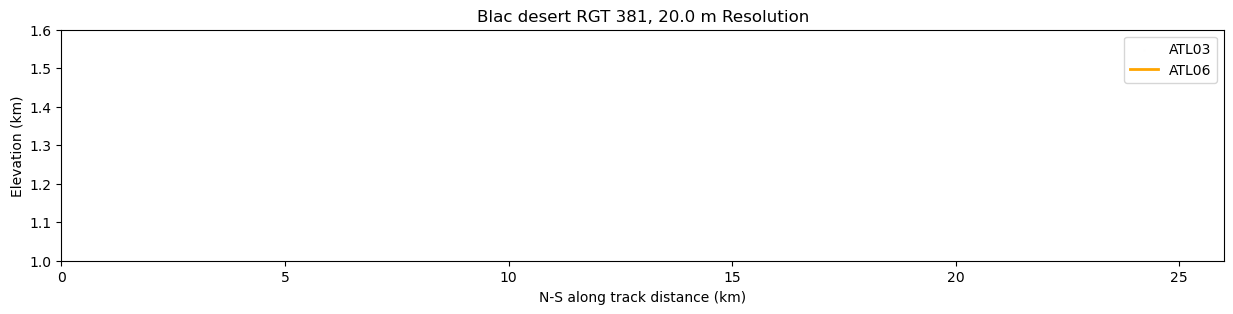

In [17]:
plt.figure(figsize=[15, 3])
plt.scatter((atl03_yapc['x_atc']-np.min(atl03_yapc['x_atc']))/1000+offset, 
            atl03_yapc.height.values/1000, color='black', s=2, alpha=0.005, label='ATL03')
plt.plot((ss_atl06_sr['distance']-np.min(ss_atl06_sr['distance']))/1000, 
         ss_atl06_sr.h_mean/1000, color='orange', linewidth=2, label='ATL06')
plt.title(f"Blac desert RGT {rgt}, {res} m Resolution")
plt.xlabel('N-S along track distance (km)')
plt.ylabel('Elevation (km)')
plt.ylim([1.0, 1.6])
plt.xlim([0, 26])
plt.legend()
plt.savefig(f'{figPath}{site}_res{res}_len{res*2}_cnf{cnf}_full.png', dpi=150)

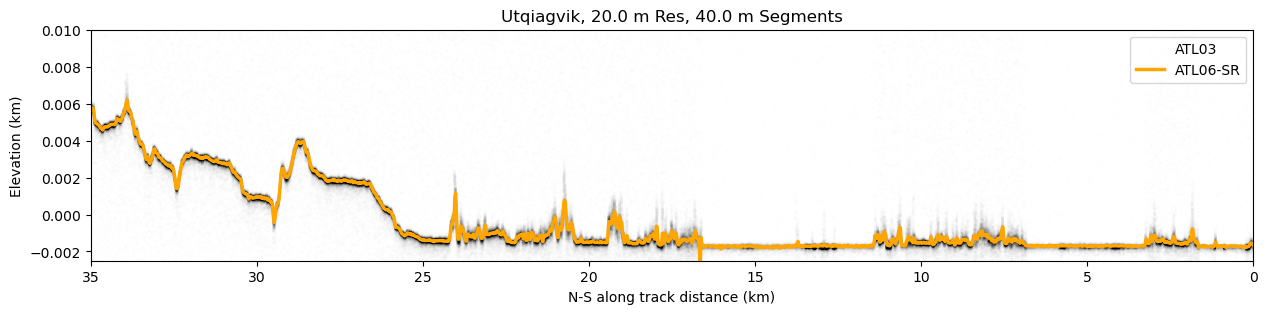

In [18]:
plt.figure(figsize=[15, 3])
plt.scatter((atl03_yapc['x_atc']-np.min(atl03_yapc['x_atc']))/1000, 
            atl03_yapc.height.values/1000, color='black', s=2, alpha=0.005, label='ATL03')
plt.plot((ss_atl06_sr['distance']-np.min(ss_atl06_sr['distance']))/1000, 
         ss_atl06_sr.h_mean/1000, color='orange', linewidth=2.5, label='ATL06-SR')
plt.title(f"Utqiagvik, {res} m Res, {res*2} m Segments")
plt.xlabel('N-S along track distance (km)')
plt.ylabel('Elevation (km)')
plt.ylim([-0.0025, 0.01])
plt.xlim([35, 0])
plt.legend()
plt.savefig(f'{figPath}{site}_res{res}_len{res*2}_cnf{cnf}.png', dpi=150)

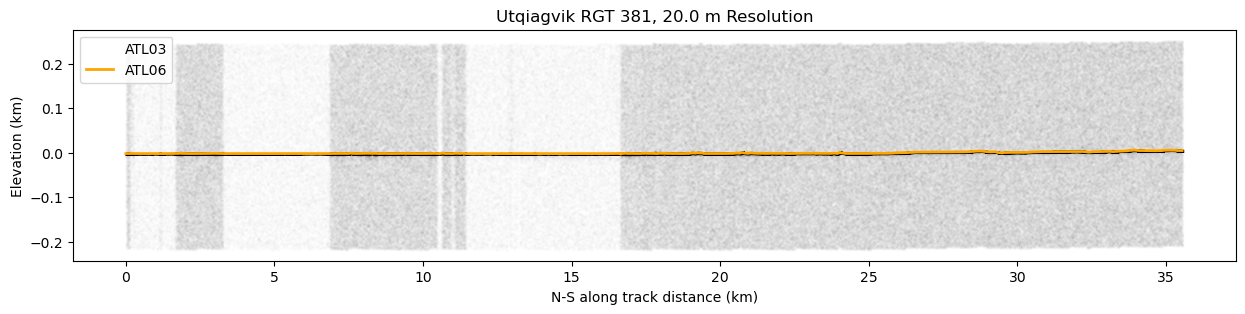

In [19]:
plt.figure(figsize=[15, 3])
plt.scatter((atl03_yapc['x_atc']-np.min(atl03_yapc['x_atc']))/1000, 
            atl03_yapc.height.values/1000, color='black', s=2, alpha=0.005, label='ATL03')
plt.plot((ss_atl06_sr['distance']-np.min(ss_atl06_sr['distance']))/1000, 
         ss_atl06_sr.h_mean/1000, color='orange', linewidth=2, label='ATL06')
plt.title(f"Utqiagvik RGT {rgt}, {res} m Resolution")
plt.xlabel('N-S along track distance (km)')
plt.ylabel('Elevation (km)')
#plt.ylim([-0.005, 0.005])
#plt.xlim([0, 5])
plt.legend()
plt.savefig(f'{figPath}{site}_res{res}_len{res*2}_cnf{cnf}_full.png', dpi=150)

In [20]:
projection = 'Global'
max_plot_point = ss_atl06_sr.shape[0]
m = ipysliderule.leaflet(projection)
m.GeoData(ss_atl06_sr, column_name='h_mean', cmap='viridis', max_plot_point=max_plot_point)

display.display(m.map)

Map(center=[39, -108], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

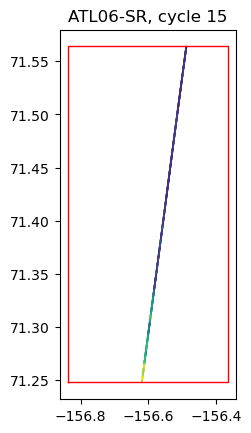

In [ ]:
# Prepare coordinate lists for plotting the region of interest polygon
region_lon = [e["lon"] for e in region]
region_lat = [e["lat"] for e in region]
f, ax = plt.subplots()
ax.set_title(f"ATL06-SR, cycle {cycle}")
ax.set_aspect('equal')
ss_atl06_sr.plot(ax=ax, column='h_mean', cmap='viridis', s=0.1)
ax.plot(region_lon, region_lat, linewidth=1, color='red');

## Plot ATL06-SR vs. ATL06

In [22]:
# Save geodataframe as csv
print(f'Saving file as {filename}')
ss_atl06_sr.to_csv(filename)

Saving file as ~/surfit/data/utqiagvik_ATL06_res20.csv


In [23]:
#Davey Jones' Locker

#pregion = gpd.read_file(poly_fn)
#poly = sliderule.toregion(pregion)["poly"]

# Read geojson with geopandas
#pregion = gpd.read_file(poly_fn)
#pregion.plot();

#gtDict = {10: "gt1l", 20: "gt1r", 30: "gt2l", 40: "gt2r", 50: "gt3l", 60: "gt3r"}

# example granule id
#gID = unpackGranuleID("ATL03_20220417011336_03811505_006_02.h5")

In [ ]:
'''
# Subset the available data
# Strong beams are spots 2, 4, 6
rgt = np.random.choice(atl06_sr["rgt"].unique())
gt = np.random.choice(atl06_sr["gt"].unique())
cycle = np.random.choice(atl06_sr["cycle"].unique())
track = atl06_sr[(atl06_sr.rgt==rgt)*(atl06_sr.cycle==cycle)*(atl06_sr['gt']==gt)]
try: 
    isSeaward = track.geometry.y.iloc[0]< track.geometry.y.iloc[10]
    dat = track.index.min().date()
    print(f"Randomly selected track: Site {site}, {dat}, Cycle {cycle}, RGT {rgt}, Beam {revgtDict[gt]}")
except: 
    print(f"Exception: Random track Site {site}, {dat}, Cycle {cycle}, RGT {rgt}, Beam {revgtDict[gt]} does not contain enough data")
    if rgt not in insufficientDataCache: insufficientDataCache.append([rgt, revgtDict[gt]])
    print(f"Insufficient data cache: {insufficientDataCache}")
'''

In [ ]:
#for b in [10, 20, 30, 40, 50, 60]:
#    print(f"{np.unique(atl06_sr[atl06_sr.loc[:, 'gt']==b].loc[:, ['gt', 'spot']])}, {revgtDict[b]}")

In [ ]:
'''

# ATL03 Processing

if accessType == 1:
    
    # Latch Start Time
    perf_start = time.perf_counter()
    
    ##### Set ATL03 sp parameters ##############################
    # build sliderule parameters for ATL03 subsetting request
    # SRT_LAND = 0
    # SRT_OCEAN = 1
    # SRT_SEA_ICE = 2
    # SRT_LAND_ICE = 3
    # SRT_INLAND_WATER = 4
    parms = {
        # processing parameters
        "srt": 0,
        "len": 10,
        "res": 10,
        # classification and checks
        # still return photon segments that fail checks
        "pass_invalid": True,
        # all photons
        "cnf": 0,
        "cnt": 5,
        "atl03_geo_fields": ["ref_azimuth", "ref_elev", "geoid"],
        "atl03_ph_fields": ["delta_time"],
        # all land classification flags
        "atl08_class": ["atl08_noise", "atl08_ground", "atl08_canopy", "atl08_top_of_canopy", "atl08_unclassified"],
        # all photons
        "yapc": dict(knn=0, win_h=6, win_x=11, min_ph=4, score=0), 
        "cycle": cycle
    }

    # ICESat-2 data release
    release = '006'

    # find granule for each region of interest
    #earthdata.set_max_resources=2000
    #granules_list = earthdata.cmr(short_name='ATL03', polygon=region, version=release)

    # create an empty geodataframe
    atl03_yapc = icesat2.atl03sp(parms, "nsidc-s3")
    
    # Latch Stop Time
    perf_stop = time.perf_counter()
    
    # Display Statistics
    perf_duration = perf_stop - perf_start
    print("Completed in {:.3f} seconds of wall-clock time".format(perf_duration))

elif accessType==0:
    print('configure atl03 data upload from file')
    atl03_yapc = pd.read_csv(atl03_filename)
'''